<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [82]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [83]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    
    # Initialize face detector and shape predictor from dlib
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    
    # Detect face landmarks
    faces = detector(face)
    landmarks = predictor(face, faces[0])
    
    
    #position chin, noise, left and right cheeks on the mask
    mask_points = np.array([(620, 700),
                        (620, 120),
                        (62, 300),
                        (1150,300)], dtype=np.float32)
    # Select corresponding landmarks on the mask image
    face_points = np.array([(landmarks.part(9).x, landmarks.part(9).y),
                            (landmarks.part(28).x, landmarks.part(28).y),
                            (landmarks.part(2).x, landmarks.part(2).y),
                            (landmarks.part(14).x, landmarks.part(14).y)], dtype=np.float32)
    
    
    # Compute matrix
    M = cv2.getPerspectiveTransform(mask_points, face_points)
    
    # Transform the mask image to fit onto a face using a perspective transformation matrix
    mask_warped = cv2.warpPerspective(mask, M, (face.shape[1], face.shape[0]))
    
    # plt.imshow(mask_warped)
    # plt.show()
    # Add the warped mask image to the face image
    # result= cv2.add(face, mask_warped)
    result = cv2.bitwise_or(face, mask_warped)
        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

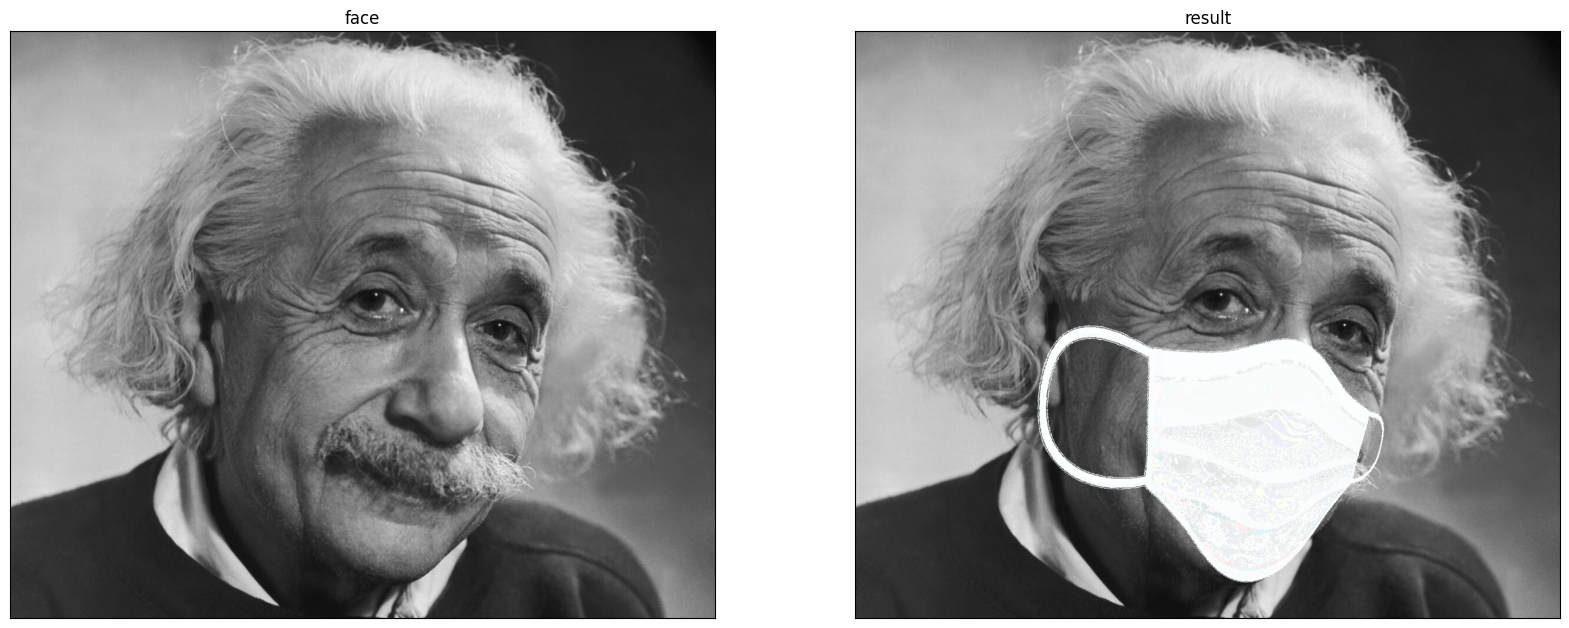

In [84]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')